<img src='../images/hanzi_hero_icon.png' style="float: left; margin: 20px; height: 55px">

# Hanzi Hero: Empowering Kids to Master Chinese Characters
<div style="text-align: right"> <H3> By Jayme Zhang </div>

---

## 5. Support Vector Machine - Multiclass

Support Vector Machines (SVM), are machine learning algorithms that excel at classifying data points. In image recognition, they classify pixels within an image to different categories representing objects, scenes, or other features you want to recognize.
  
SVMs perform well even with limited training data because they focus on the most informative data points (support vectors). The decision boundary learned by the SVM provides insights into how the model differentiates between classes. This can be helpful for understanding and debugging the model.
  
In this notebook, we will build this model as a baseline comparison to the previous deep learning CNN models we have built, and select one to perform hyperparameter tuning.  

As with previous notebooks, we will be using the same 10 Chinese characters for consistency.

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay

### 5.1 Basic Setup

#### 5.1.1 Set font for output of Chinese characters

Since our labels include Chinese characters, for the characters to be displayed correctly on visualisations, we will set the fonts to be compatible.

In [41]:
# To check if the Chinese font for Simplified Chinese Songti is available
print([f for f in fm.fontManager.ttflist if 'Songti' in f.name])

[FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')]


In [42]:
# To display Chinese characters in matplotlib
plt.rcParams['font.family'] = ['Songti SC']

### 5.2 Image Preprocessing

We will be defining a function to read the image from the directory, and convert the image to numpy array. We will be resizing the image to (64, 64), with 1 channel for greyscale image, flatten it and append the array and its label to a dataframe.

In [8]:
labels=['家', '衣', '车', '你', '吃', '的', '妈', '爱', '爸', '我']

# To define a function to convert image to array
def image_to_array (datadir):
    flat_data_arr=[] # image array
    target_arr=[] # labels 
    for i in labels:
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            if img.endswith(".png"):
                img_array=imread(os.path.join(path,img))
                img_resized=resize(img_array,(64,64,1)) # resize to (64,64), 1 channel for greyscale
                flat_data_arr.append(img_resized.flatten()) # flatten 2D array to 1D array, and append to list
                target_arr.append(labels.index(i)) # append corresponding label to list
    
    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)
    df=pd.DataFrame(flat_data) # convert list into a dataframe
    df['Target']=target # add in a column for labels
    X=df.iloc[:,:-1] 
    y=df.iloc[:,-1] 

    return X, y

### 5.3 Train and Test Data

We will make use of the function created above to set up train and test data.

In [9]:
# To set up train data
X_train, y_train = image_to_array('../data/multiclass_data/train')

# To set up test data
X_test, y_test = image_to_array('../data/multiclass_data/valid')

### 5.4 Fit the Model

Now that the train and test data are set up properly, we will proceed to fit the model with the training data.

In [28]:
# Instantiate support vector machine
svc = SVC(probability=True) # to obtain predicted probabilities for AUC and log loss calculations

In [29]:
# Fit SVM with training data
svc.fit(X_train, y_train)

SVC(probability=True)

### 5.5 Performance of Model

We will use the model trained to generate predictions and assess its performance based on the same metrics from previous: accuracy and AUC.

#### 5.5.1 Generate predictions

In [18]:
# Generate predictions for train and test data
y_train_pred = svc.predict(X_train)
y_train_pred_prob = svc.predict_proba(X_train)  # Predict probabilities for AUC and log loss

y_test_pred = svc.predict(X_test)
y_test_pred_prob = svc.predict_proba(X_test)  # Predict probabilities for AUC and log loss

#### 5.5.2 Summary of Metrics

In [33]:
summary_metrics = {}

summary_metrics['Train loss'] = log_loss(y_train, y_train_pred_prob)
summary_metrics['Val loss'] = log_loss(y_test, y_test_pred_prob)
summary_metrics['Train accuracy'] = accuracy_score(y_train, y_train_pred)
summary_metrics['Val accuracy'] = accuracy_score(y_test, y_test_pred)
summary_metrics['Train AUC'] = roc_auc_score(y_train, y_train_pred_prob, average='macro', multi_class='ovr')  # AUC for multiclass
summary_metrics['Val AUC'] = roc_auc_score(y_test, y_test_pred_prob, average='macro', multi_class='ovr')  # AUC for multiclass


print('Summary of metrics for SVM Multiclass Model')
print(summary_metrics)

Summary of metrics for SVM Multiclass Model
{'Train loss': 0.0636448844119359, 'Val loss': 0.8311614711044732, 'Train accuracy': 0.9823185988323603, 'Val accuracy': 0.8328651685393258, 'Train AUC': 0.9996907148019408, 'Val AUC': 0.9773981467330891}


#### 5.5.3 Confusion Matrix

A confusion matrix shows the detailed breakdown of the model's predictions and the actual classes.

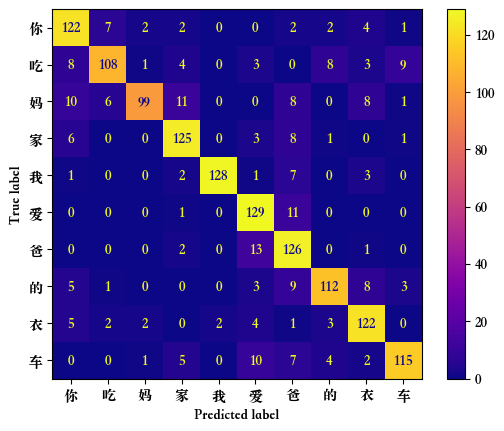

In [43]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
            display_labels=['你', '吃', '妈', '家', '我',
            '爱','爸', '的', '衣', '车'])
disp.plot(cmap='plasma')
plt.show()

The diagonal line from top left to bottom right represents the true positives (data that was correctly predicted). The diagonal line is very close to yellow, which is the higher end of the spectrum. The number of data outside of the diagonal line is generally under 10. This shows that the model is able to produce a very reasonable prediction.

### 5.6 Summary of Baseline Model Metrics

Here is a visual comparison of the performance of all our baseline models.

In [2]:
# Compile metrics from output cell of previous notebooks
model_1 = {'Model': 'self_trained_multiclass', 'Train loss': 0.14485211670398712, 'Val loss': 0.12519174814224243, 'Train accuracy': 0.9532943964004517, 'Val accuracy': 0.9599719047546387, 'Train AUC': 0.9975926876068115, 'Val AUC': 0.9987270832061768}
model_2 = {'Model': 'pre_trained_mobilenetv2', 'Train loss': 0.13816504180431366, 'Val loss': 0.3228445053100586, 'Train accuracy': 0.9709758162498474, 'Val accuracy': 0.9009831547737122, 'Train AUC': 0.9992102384567261, 'Val AUC': 0.9929900169372559}
model_3 = {'Model': 'pre_trained_resnet50v2','Train loss': 0.09039781987667084, 'Val loss': 0.31935960054397583, 'Train accuracy': 0.9844870567321777, 'Val accuracy': 0.9002808928489685, 'Train AUC': 0.9998509287834167, 'Val AUC': 0.992445170879364}
model_4 = {'Model': 'svm_multiclass' ,'Train loss': 0.0636448844119359, 'Val loss': 0.8311614711044732, 'Train accuracy': 0.9823185988323603, 'Val accuracy': 0.8328651685393258, 'Train AUC': 0.9996907148019408, 'Val AUC': 0.9773981467330891}

# Create dataframe
df = pd.DataFrame([model_1, model_2, model_3, model_4])

In [23]:
display(df)

,Model,Train loss,Val loss,Train accuracy,Val accuracy,Train AUC,Val AUC
0,self_trained_multiclass,0.144852,0.125192,0.953294,0.959972,0.997593,0.998727
1,pre_trained_mobilenetv2,0.138165,0.322845,0.970976,0.900983,0.999210,0.992990
2,pre_trained_resnet50v2,0.090398,0.319360,0.984487,0.900281,0.999851,0.992445
3,svm_multiclass,0.063645,0.831161,0.982319,0.832865,0.999691,0.977398


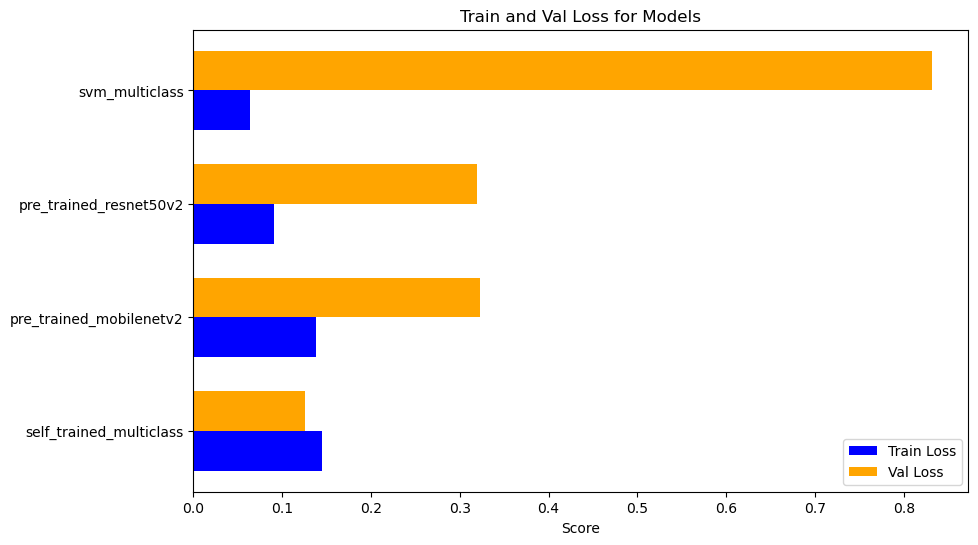

In [5]:
# To plot horizontal bar graphs for train and val loss
models = df['Model']
bar_width = 0.35

# Set positions for the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10,6))
# Plot train scores for Model A and Model B
plt.barh(r1, df['Train loss'], color='blue', height=bar_width, label='Train Loss')

# Plot test scores for Model A and Model B
plt.barh(r2, df['Val loss'], color='orange', height=bar_width, label='Val Loss')

# Add labels and title
plt.xlabel('Score')
plt.title('Train and Val Loss for Models')
plt.yticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend();

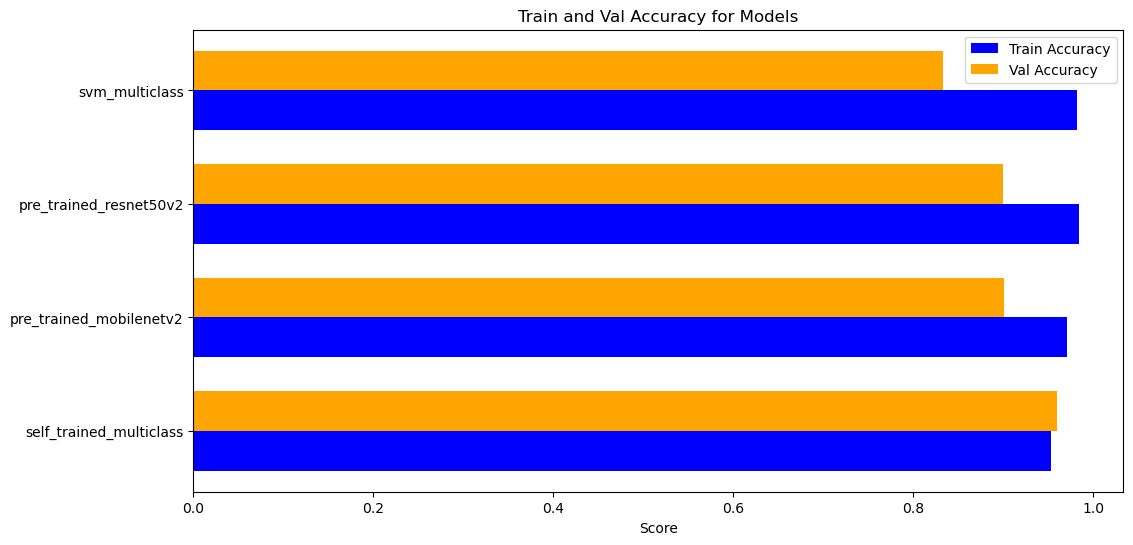

In [7]:
# To plot horizontal bar graphs for train and val accuracy
models = df['Model']
bar_width = 0.35

# Set positions for the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12,6))
# Plot train scores for Model A and Model B
plt.barh(r1, df['Train accuracy'], color='blue', height=bar_width, label='Train Accuracy')

# Plot test scores for Model A and Model B
plt.barh(r2, df['Val accuracy'], color='orange', height=bar_width, label='Val Accuracy')

# Add labels and title
plt.xlabel('Score')
plt.title('Train and Val Accuracy for Models')
plt.yticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend(loc='best');

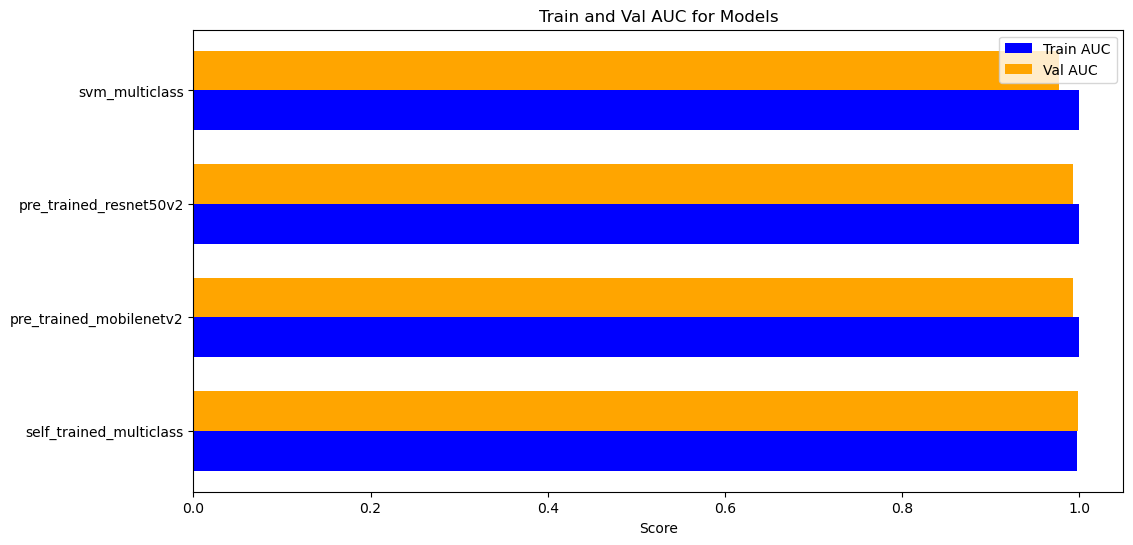

In [8]:
# To plot horizontal bar graphs for train and val AUC
models = df['Model']
bar_width = 0.35

# Set positions for the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12,6))
# Plot train scores for Model A and Model B
plt.barh(r1, df['Train AUC'], color='blue', height=bar_width, label='Train AUC')

# Plot test scores for Model A and Model B
plt.barh(r2, df['Val AUC'], color='orange', height=bar_width, label='Val AUC')

# Add labels and title
plt.xlabel('Score')
plt.title('Train and Val AUC for Models')
plt.yticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend(loc='best');

Based on the above metrics:
  
1. The validation loss measures the difference between the predicted values and the actual values in the validation dataset. A lower validation loss indicates that the model's predictions are closer to the actual values. The self-trained multiclass model has the lowest val loss amongst all 4 models.
  
2. The two pre-trained models and SVM had the highest train accuracy. However, the val accuracy for these models are much lesser. This is a sign of overfitting, and the model is unable to generalise well on unseen data. Although the self-trained multiclass model has slightly lower train accuracy, its val accuracy is very close to the train accuracy.
  
3. AUC is a measure of the ability of a classifier to distinguish between clsses. The higher the AUC, the better the model's performance, with a perfect AUC score being 1. In this aspect, all 4 models are performing well.

Conclusion: we will select the __self-trained multiclass model__ for tuning of hyperparameters since it shows the best train and val accuracy score. We will explore that in the next notebook [06_Self_Trained_Model_Multiclass_HP_Tune](06_Self_Trained_Model_Multiclass_HP_Tune.ipynb).